# MNIST Digit Classification using Neural Networks

In [11]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading the MNIST data from keras.datasets

In [12]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [13]:
type(X_train)

numpy.ndarray

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
# printing 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

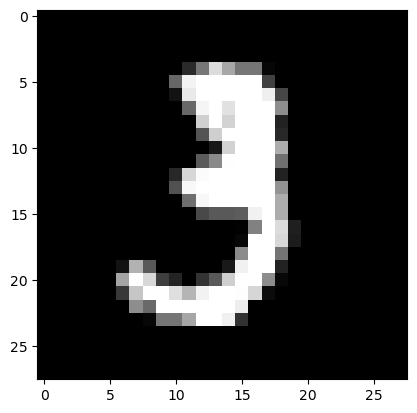

In [16]:
plt.imshow(X_train[10], cmap='gray')

In [17]:
X_train[10].shape

(28, 28)

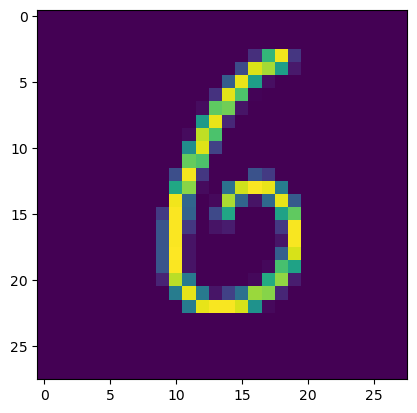

6


In [18]:
# displaying the 10th image
plt.imshow(X_train[18])
plt.show()

print(y_train[18])

In [19]:
# unique values in test data
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [20]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

### Building the Neural Network

In [21]:
# setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
# compiling the neural network
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
# training the neural network
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 8s 3ms/step - loss: 0.2995 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0793 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

Training data accuracy is 98.91%

### Accuracy on test data

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9767


In [25]:
accuracy

0.9767000079154968

Test data accuracy is 97.28

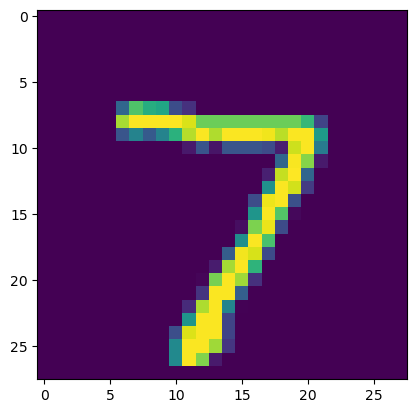

7


In [26]:
# 1st data point in X_test
plt.imshow(X_test[0])
plt.show()

print(y_test[0])

In [27]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
print(y_pred[0])

[5.3656788e-04 4.1732476e-03 1.4569324e-01 9.9695033e-01 1.4356332e-06
 3.6174327e-02 4.5157614e-07 9.9999982e-01 2.6381042e-02 2.1722005e-01]


In [29]:
np.argmax(y_pred[0])

7

In [30]:
# converting the prediction probabilities into labels


y_pred_labels = [np.argmax(x) for x in y_pred]

In [31]:
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


### Confusion matrix

In [32]:
confusion_matrix = confusion_matrix(y_test, y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    1,    2,    1,    3,    4,    0],
       [   0, 1122,    4,    1,    0,    1,    2,    1,    4,    0],
       [   6,    0, 1003,    8,    3,    0,    1,    7,    3,    1],
       [   0,    0,    3,  994,    1,    3,    0,    2,    3,    4],
       [   1,    0,    2,    2,  955,    0,    5,    3,    1,   13],
       [   2,    0,    0,   10,    1,  868,    2,    0,    6,    3],
       [   7,    2,    2,    2,    3,    2,  939,    0,    1,    0],
       [   1,    2,   13,    2,    0,    0,    0, 1000,    3,    7],
       [   6,    0,    4,    5,    4,    3,    1,    3,  943,    5],
       [   1,    2,    0,    2,    9,    2,    2,   11,    4,  976]])>

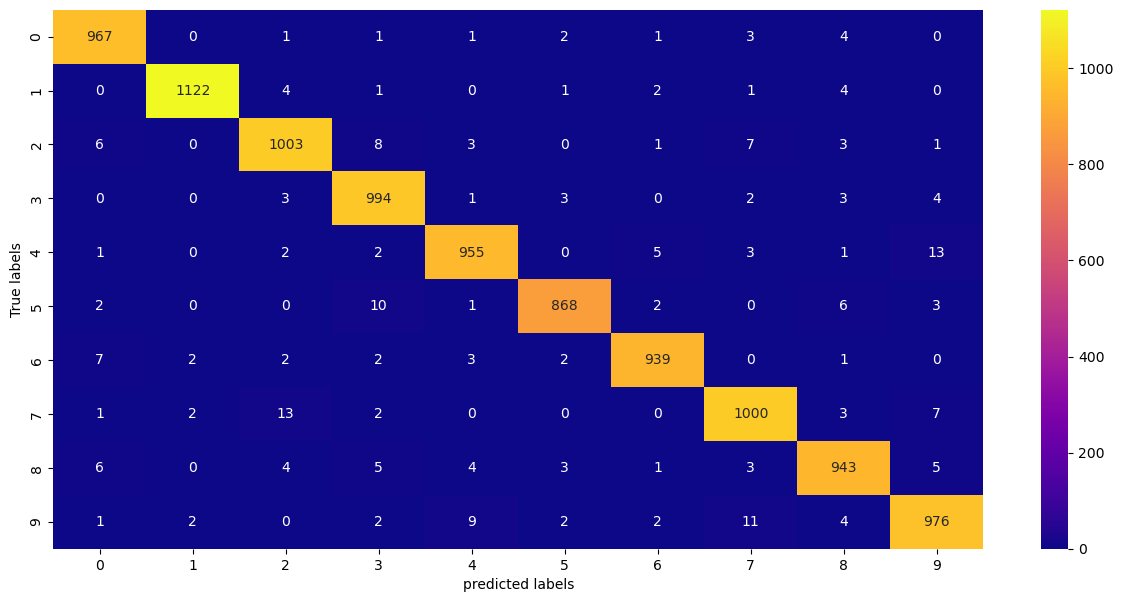

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='plasma')
plt.xlabel("predicted labels")
plt.ylabel("True labels")
plt.show()

### Build a predictive system

In [34]:
input_image_path = "C:\\Users\\91897\\Downloads\\MNIST_digit.png"

input_image = cv2.imread(input_image_path)

In [35]:
type(input_image)

numpy.ndarray

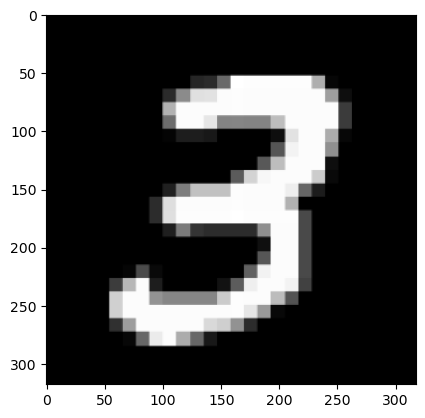

In [36]:
plt.imshow(input_image)

In [37]:
input_image.shape

(318, 318, 3)

In [38]:
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale_image.shape

(318, 318)

In [39]:
grayscale_image_resized = cv2.resize(grayscale_image, (28,28))
grayscale_image_resized.shape

(28, 28)

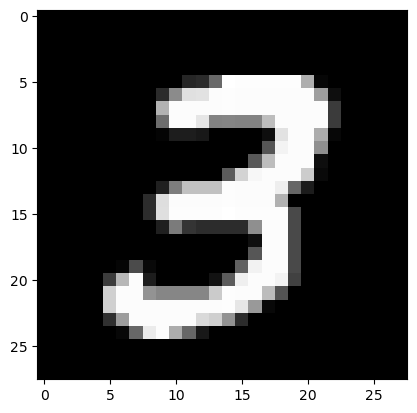

In [40]:
plt.imshow(grayscale_image_resized, cmap='gray')

In [41]:
grayscale_image_resized = grayscale_image_resized/255

In [42]:
img_reshaped = np.reshape(grayscale_image_resized, [1,28,28])

In [43]:
img_reshaped.shape

(1, 28, 28)

In [44]:
prediction_prob = model.predict(img_reshaped)
prediction_prob

1/1 [==============================] - 0s 46ms/step


array([[2.4750381e-07, 5.6557998e-04, 2.0394377e-04, 1.0000000e+00,
        1.7576208e-11, 9.2543018e-01, 1.4004841e-09, 2.7448962e-02,
        9.2766398e-01, 9.9262977e-01]], dtype=float32)

In [45]:
prediction_label = np.argmax(prediction_prob)
prediction_label

3

In [46]:
# read path
# load image as array
# convert to gray scale
# resize the array
# scale the values
# reshape the array
# predict the digit

## Predictive System

In [49]:
print("Hand Written Digit Prediction")

# reading the path
input_path = input("Enter image path: ")

# loading the image as ndarray
input_img = cv2.imread(input_path)

# displaying the  original image
# plt.title("Original Image")
# plt.imshow(input_img)
# plt.show()

# conveting to grayscale
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

# resizing the array
resized_img = cv2.resize(grayscale, (28,28))

# scaling the values
img_scaled = resized_img/255

# reshapeing the array
final_img = np.reshape(img_scaled, [1,28,28])

# predicting the probabilities
probs = model.predict(final_img)

# digit
digit = np.argmax(probs)
print("The digit is recognized as: ",digit)



Hand Written Digit Prediction
Enter image path: C:\Users\91897\Downloads\MNIST_digit.png
1/1 [==============================] - 0s 53ms/step
The digit is recognized as:  3
